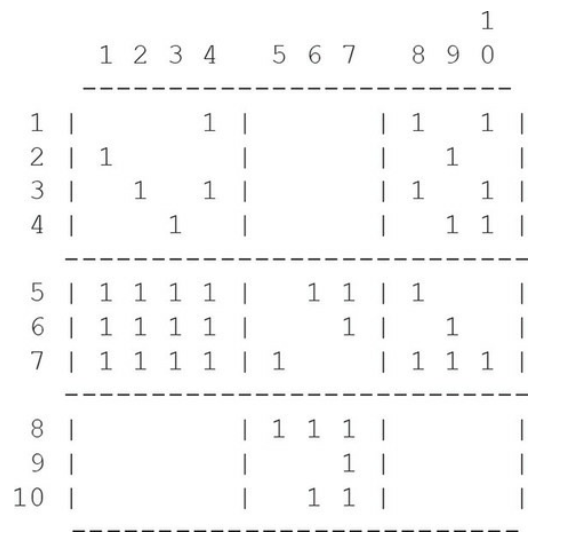

1. Création de la Matrice d'Adjacence

D'abord, nous devons créer la matrice d'adjacence basée sur l'exemple fournie.

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Création de la matrice d'adjacence à partir de l'exemple fournie
adj_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
])

print("Matrice d'adjacence :")
print(adj_matrix)


Matrice d'adjacence :
[[0 0 0 1 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 1 1 0 0]
 [1 1 1 1 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 1 1 1]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]]


2. Calcul des Similarités Structurelles

Nous allons maintenant calculer les similarités structurelles entre les nœuds. Une approche simple consiste à utiliser les distances de Jaccard.

In [31]:
from sklearn.metrics import jaccard_score

# Calcul des similarités de Jaccard entre tous les paires de nœuds
n = adj_matrix.shape[0]
similarities = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            similarities[i, j] = jaccard_score(adj_matrix[i], adj_matrix[j])

print("Matrice des similarités :")
print(similarities)


Matrice des similarités :
[[0.         0.         0.75       0.2        0.25       0.125
  0.375      0.         0.         0.        ]
 [0.         0.         0.         0.25       0.125      0.33333333
  0.25       0.         0.         0.        ]
 [0.75       0.         0.         0.16666667 0.375      0.25
  0.5        0.         0.         0.        ]
 [0.2        0.25       0.16666667 0.         0.11111111 0.28571429
  0.375      0.         0.         0.        ]
 [0.25       0.125      0.375      0.11111111 0.         0.625
  0.5        0.25       0.14285714 0.28571429]
 [0.125      0.33333333 0.25       0.28571429 0.625      0.
  0.55555556 0.125      0.16666667 0.14285714]
 [0.375      0.25       0.5        0.375      0.5        0.55555556
  0.         0.1        0.         0.        ]
 [0.         0.         0.         0.         0.25       0.125
  0.1        0.         0.33333333 0.66666667]
 [0.         0.         0.         0.         0.14285714 0.16666667
  0.         0.

3. Clustering Basé sur les Similarités

Nous utilisons un algorithme de clustering, comme KMeans, pour identifier les classes d'équivalence régulière.

In [32]:
from sklearn.cluster import KMeans

# Clustering des nœuds en fonction des similarités
kmeans = KMeans(n_clusters=3, random_state=0).fit(similarities)
labels = kmeans.labels_

print("Classes d'équivalence régulière :")
print(labels)


Classes d'équivalence régulière :
[0 1 1 1 1 0 1 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4. Visualisation des Résultats

Nous visualisons le graphe avec des couleurs différentes pour chaque classe d'équivalence.

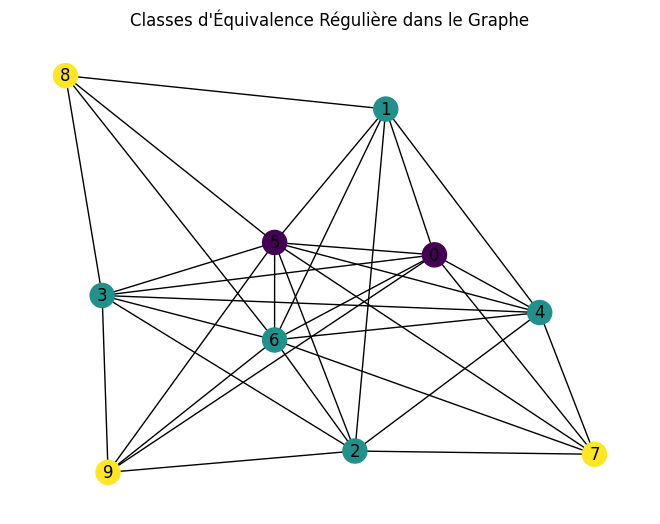

In [33]:
# Création du graphe à partir de la matrice d'adjacence
G = nx.from_numpy_array(adj_matrix)

# Visualisation du graphe avec les classes d'équivalence
colors = labels
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.viridis)
plt.title("Classes d'Équivalence Régulière dans le Graphe")
plt.show()
